## Análise exploratória dos dados

### Bibliotecas

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#Estilizar conteúdo
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def estilo_tabelas(df, max_altura='300px', casas_decimais=3):
    return (
        df.style.set_table_styles(
            [
                {'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center'), ('border-bottom', '2px solid #007BFF')]},  # Azul abaixo do nome das colunas
                {'selector': 'td', 'props': [('font-size', '10px'), ('text-align', 'center'), ('max-height', '40px'), ('white-space', 'nowrap'), ('text-overflow', 'ellipsis'), ('overflow', 'hidden'), ('max-width', '100px')]},
                {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Fundo alternado
                {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},
                {'selector': 'table', 'props': [('width', '90%'), ('margin-left', 'auto'), ('margin-right', 'auto'), ('border-collapse', 'collapse')]},
                {'selector': 'td, th', 'props': [('border', '1px solid #666')]},  # Bordas cinza escuro
            ]
        ).set_properties(
            **{'background-color': '#f4f4f4', 'border-color': 'darkgray', 'border-style': 'solid', 'border-width': '1px'}
        ).set_table_attributes(
            f'style="height:auto; overflow:auto; max-height:{max_altura}; display:block;"'  
        ).format(
            precision=casas_decimais  
        )
    )

### Base de dados

In [2]:
object_columns = ['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
                  'Setores Censitários', 'Status', 'DH_Descricao', 'DM_Descricao',
                  'DA_Descricao', 'DA_Polui/cont da água', 'DA_Polui/cont do ar',
                  'DA_Polui/cont do solo', 'DA_Dimi/exauri hídrico',
                  "DA_Incêndi parques/APA's/APP's", 'PEPL_Descricao', 'PEPR_Descricao',
                  'Categoria', 'Grupo', 'Subgrupo', 'Tipo', 'Subtipo']

dtype = {col: 'object' for col in object_columns}

df_eventos = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_desastres_rec_nrec.csv",
    sep=';',
    dtype = dtype,
    decimal=',',
)

estilo_tabelas(df_eventos.head(5))

,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,codigo_ibge,Setores Censitários,Status,DH_Descricao,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Descricao,DM_Uni Habita Danificadas,DM_Uni Habita Destruidas,DM_Uni Habita Valor,DM_Inst Saúde Danificadas,DM_Inst Saúde Destruidas,DM_Inst Saúde Valor,DM_Inst Ensino Danificadas,DM_Inst Ensino Destruidas,DM_Inst Ensino Valor,DM_Inst Serviços Danificadas,DM_Inst Serviços Destruidas,DM_Inst Serviços Valor,DM_Inst Comuni Danificadas,DM_Inst Comuni Destruidas,DM_Inst Comuni Valor,DM_Obras de Infra Danificadas,DM_Obras de Infra Destruidas,DM_Obras de Infra Valor,DM_total_danos_materiais,DA_Descricao,DA_Polui/cont da água,DA_Polui/cont do ar,DA_Polui/cont do solo,DA_Dimi/exauri hídrico,DA_Incêndi parques/APA's/APP's,PEPL_Descricao,PEPL_Assis_méd e emergên(R$),PEPL_Abast de água pot(R$),PEPL_sist de esgotos sanit(R$),PEPL_Sis limp e rec lixo (R$),PEPL_Sis cont pragas (R$),PEPL_distrib energia (R$),PEPL_Telecomunicações (R$),PEPL_Tran loc/reg/l_curso (R$),PEPL_Distrib combustíveis(R$),PEPL_Segurança pública (R$),PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Ano_Evento,Empenhado,DensidadePop,Area,Município - UF,PIB,DOMICILIO_AREARURAL,PDEFAGUA,PDEFESGOTO,PDEFLIXO,PDEFSAN,QTDE_FAMILIAS_ATUALIZADAS,Categoria,Grupo,Subgrupo,Tipo,Subtipo,COBRADE,Pop
0,SP-A-3550001-12200-20100101,São Luiz do Paraitinga,SP,Sudeste,2010-01-01,2010-01-01,3550001,nan,Reconhecido,nan,0,0,0,93,4030,0,16,4139,nan,49,20,20643486.932,3.000,0,1121928.638,9.000,1,5235666.976,0,0,0.000,3,3,32411.272,25.000,0.000,65321178.458,92354672.275,nan,nan,nan,nan,nan,nan,nan,7978.159,673157.183,623293.688,2493.175,0.000,330993.880,3739.762,58609.552,0.000,0.000,1087024.191,2787289.589,nan,1642902.433,1149353.560,379785.310,0.000,24433.113,3196474.416,5983764.005,2010,nan,nan,nan,São Luiz do Paraitinga - SP,86448.000,nan,nan,nan,nan,nan,nan,Natural,Hidrológico,Enxurradas,nan,nan,12200,10397.000
1,SP-A-3518305-11321-20100101,Guararema,SP,Sudeste,2010-01-01,2010-01-01,3518305,nan,Reconhecido,nan,4,2,0,66,417,0,14430,14919,nan,161,91,18604069.987,0.000,0,0.000,2.000,0,24931.748,0,0,0.000,0,0,37397.621,9000.000,0.000,57771845.314,76438244.669,nan,nan,nan,nan,nan,nan,nan,0.000,179508.582,264276.524,12465.874,0.000,349044.465,74795.243,134631.437,0.000,0.000,77288.417,1092010.541,nan,441291.931,2049389.645,0.000,0.000,112192.889,2602874.464,3694885.005,2010,nan,nan,nan,Guararema - SP,1111405.000,nan,nan,nan,nan,nan,nan,Natural,Geológico,Movimento de massa,Deslizamentos,Deslizamentos de solo e ou rocha,11321,25844.000
2,BA-A-2905909-14110-20100101,Campo Alegre de Lourdes,BA,Nordeste,2010-01-01,2010-01-01,2905909,nan,Reconhecido,nan,0,0,0,0,0,0,0,0,nan,0,0,0.000,0.000,0,0.000,0.000,0,0.000,0,0,0.000,0,0,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,747.952,448771.455,0.000,0.000,0.000,0.000,0.000,249317.475,0.000,0.000,177015.407,875852.290,nan,254303.825,147097.310,0.000,0.000,0.000,401401.135,1277253.425,2010,nan,9.638,2914.587,Campo Alegre de Lourdes - BA,107459.000,nan,nan,nan,nan,nan,nan,Natural,Climatológico,Seca,Estiagem,nan,14110,28090.000
3,SP-A-3513603-12100-20100101,Cunha,SP,Sudeste,2010-01-01,2010-01-01,3513603,nan,Reconhecido,nan,6,0,0,38,492,0,12000,12536,nan,89,9,3340854.165,0.000,0,0.000,0.000,0,0.000,0,0,0.000,0,0,0.000,3.000,400.000,8052097.614,11392951.779,nan,nan,nan,nan,nan,nan,nan,0.000,1246.587,0.000,0.000,0.000,1994539.800,0.000,125656.007,0.000,0.000,0.000,2121442.395,nan,49863.495,1383711.986,0.000,0.000,925466.467,2359041.949,4480484.344,2010,nan,15.538,1407.250,Cunha - SP,112225.000,nan,nan,nan,nan,nan,nan,Natural,Hidrológico,Inundações,nan,nan,12100,21866.000
4,BA-P-2917334-12200-20100101,Iuiu,BA,Nordeste,2010-01-01,2010-01-01,2917334,nan,Reconhecido,nan,0,0,0,0,0,0,0,0,

### Análise preliminar

#### Todos as variáveis

#### Tipo

In [3]:
df_eventos_tipo = df_eventos.dtypes.reset_index().rename(columns={0: '.dtype', 'index': 'Variável'})
estilo_tabelas(df_eventos_tipo)

,Variável,.dtype
0,Protocolo_S2iD,object
1,Nome_Municipio,object
2,Sigla_UF,object
3,regiao,object
4,Data_Registro,object
5,Data_Evento,object
6,codigo_ibge,int64
7,Setores Censitários,object
8,Status,object
9,DH_Descricao,object


#### Estatísticas descritivas

In [4]:
estilo_tabelas(df_eventos.describe())

,codigo_ibge,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Uni Habita Danificadas,DM_Uni Habita Destruidas,DM_Uni Habita Valor,DM_Inst Saúde Danificadas,DM_Inst Saúde Destruidas,DM_Inst Saúde Valor,DM_Inst Ensino Danificadas,DM_Inst Ensino Destruidas,DM_Inst Ensino Valor,DM_Inst Serviços Danificadas,DM_Inst Serviços Destruidas,DM_Inst Serviços Valor,DM_Inst Comuni Danificadas,DM_Inst Comuni Destruidas,DM_Inst Comuni Valor,DM_Obras de Infra Danificadas,DM_Obras de Infra Destruidas,DM_Obras de Infra Valor,DM_total_danos_materiais,PEPL_Assis_méd e emergên(R$),PEPL_Abast de água pot(R$),PEPL_sist de esgotos sanit(R$),PEPL_Sis limp e rec lixo (R$),PEPL_Sis cont pragas (R$),PEPL_distrib energia (R$),PEPL_Telecomunicações (R$),PEPL_Tran loc/reg/l_curso (R$),PEPL_Distrib combustíveis(R$),PEPL_Segurança pública (R$),PEPL_Ensino (R$),PEPL_total_publico,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Ano_Evento,Empenhado,DensidadePop,Area,PIB,DOMICILIO_AREARURAL,PDEFAGUA,PDEFESGOTO,PDEFLIXO,PDEFSAN,QTDE_FAMILIAS_ATUALIZADAS,COBRADE,Pop
count,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,26258.000,4024.000,16907.000,19171.000,20443.000,13170.000,13170.000,13170.000,13170.000,13170.000,13170.000,26258.000,23244.000
mean,3159209.608,0.096,2.324,32.258,36.075,163.129,0.049,6527.962,6761.890,70.163,11.313,1424283.148,0.554,10.423,36069.598,0.569,0.119,70572.425,0.048,0.091,12734.643,0.578,0.200,37174.814,863.761,190472.764,1456701.508,3037536.136,65368.546,806901.058,149728.242,51488.537,7935.827,18068.690,4536.807,370284.834,7895.056,12323.813,53594.445,1548125.857,8566347.268,2599208.586,333617.514,1972882.462,378106.028,13850161.858,15398287.714,2017.402,1438987.947,78.629,1974.949,848257.056,0.365,0.303,0.450,0.245,0.153,1015.528,13578.604,33492.023
std,918980.832,3.600,67.382,421.658,409.864,1274.632,3.034,30912.350,31125.607,771.939,343.383,51175714.443,10.865,187.076,597770.299,3.801,1.501,1120454.142,0.757,1.222,583173.525,18.841,13.220,642217.441,115578.375,30855968.420,14311996.384,59569863.084,1389175.846,8651393.188,4075078.901,649395.119,217727.188,243492.728,153784.532,4281597.810,267610.399,601226.251,628209.067,11429204.377,39525545.450,12352086.874,6606823.348,91786610.913,8349024.834,105653327.355,106948387.084,4.041,5179809.047,361.168,7237.323,9386767.883,0.222,0.218,0.323,0.196,0.157,4174.122,966.575,178125.766
min,1100015.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2010.000,0.000,0.031,25.704,-19046.000,0.000,0.000,0.000,0.000,0.000,1.000,11110.000,822.000
25%,2504405.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,31726.367,2014.000,124264.250,12.064,213.727,66273.000,0.185,0.130,0.146,0.073,0.024,85.000,13214.000,6091.750
50%,2930766.000,0.000,0.000,0.000,0.000,0.000,0.000,1927.500,2090.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,77211.627,467150.532,21983

#### Variáveis independentes (features)

##### Há protocolos duplicados?

In [5]:
df_eventos["Protocolo_S2iD"].duplicated().sum()

np.int64(0)

Não há protocolos duplicados

#### Matriz de correlação

#### Todas as variáveis

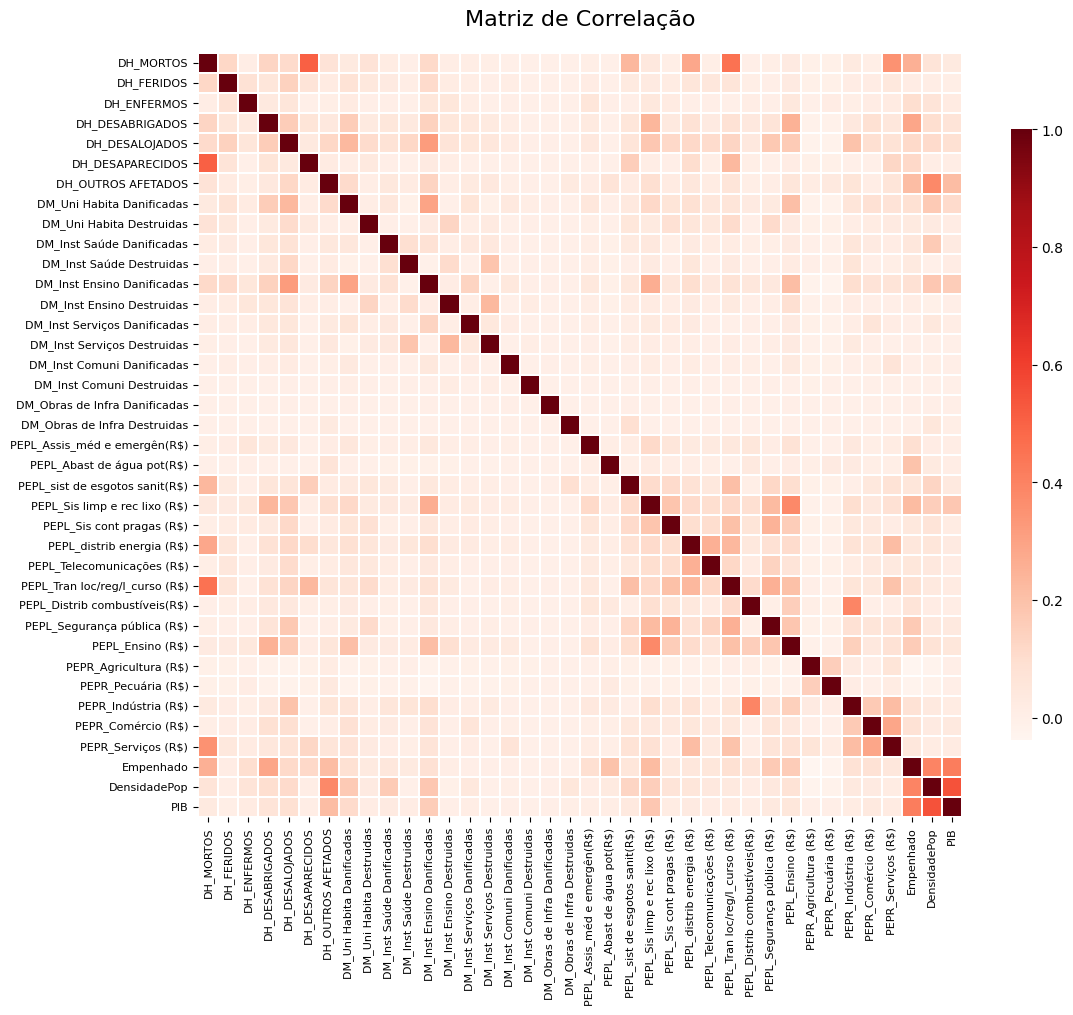

In [6]:
# Correlação entre as variáveis independentes

variaveisnum_todas = [
    'DH_MORTOS', 'DH_FERIDOS', 'DH_ENFERMOS', 'DH_DESABRIGADOS', 'DH_DESALOJADOS', 'DH_DESAPARECIDOS', 'DH_OUTROS AFETADOS',
    'DM_Uni Habita Danificadas', 'DM_Uni Habita Destruidas',  
    'DM_Inst Saúde Danificadas', 'DM_Inst Saúde Destruidas', 
    'DM_Inst Ensino Danificadas', 'DM_Inst Ensino Destruidas',  
    'DM_Inst Serviços Danificadas', 'DM_Inst Serviços Destruidas',  
    'DM_Inst Comuni Danificadas', 'DM_Inst Comuni Destruidas',  
    'DM_Obras de Infra Danificadas', 'DM_Obras de Infra Destruidas', 
    'PEPL_Assis_méd e emergên(R$)', 'PEPL_Abast de água pot(R$)', 'PEPL_sist de esgotos sanit(R$)', 
    'PEPL_Sis limp e rec lixo (R$)', 'PEPL_Sis cont pragas (R$)', 'PEPL_distrib energia (R$)', 
    'PEPL_Telecomunicações (R$)', 'PEPL_Tran loc/reg/l_curso (R$)', 'PEPL_Distrib combustíveis(R$)', 
    'PEPL_Segurança pública (R$)', 'PEPL_Ensino (R$)', 'PEPR_Agricultura (R$)', 
    'PEPR_Pecuária (R$)', 'PEPR_Indústria (R$)', 'PEPR_Comércio (R$)', 'PEPR_Serviços (R$)',
    'Empenhado', 'DensidadePop', 'PIB'
]

df_corr_todas = df_eventos[variaveisnum_todas]

correlacao_todas = df_corr_todas.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlacao_todas, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.2, 
    linecolor='white',
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)
plt.title('Matriz de Correlação', fontsize=16, pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

##### Variáveis selecionadas

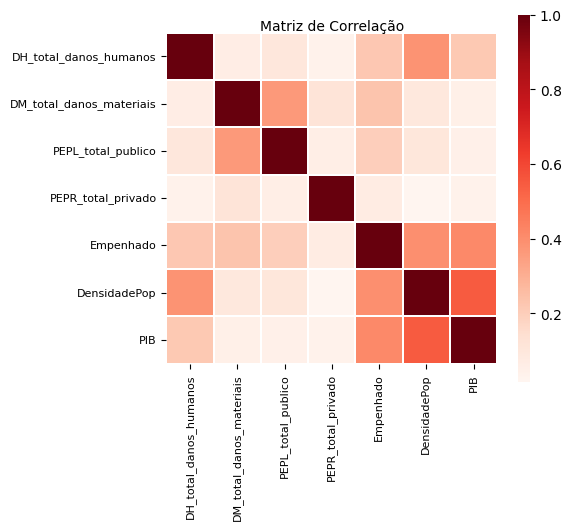

In [7]:
variaveisnum_selecionadas = [
    'DH_total_danos_humanos', 'DM_total_danos_materiais', 'PEPL_total_publico', 'PEPR_total_privado', 'Empenhado', 'DensidadePop', 'PIB'
]

df_corr_selecionadas = df_eventos[variaveisnum_selecionadas]

correlacao_selecionadas = df_corr_selecionadas.corr()

plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(
    correlacao_selecionadas, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.2, 
    linecolor='white',
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)
plt.title('Matriz de Correlação', fontsize=10, pad=2)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

#### Variável dependente (target)

#### Balanceamento

In [8]:
status_counts = df_eventos['Status'].value_counts()
print("\nDistribuição da variável 'Status':")
display(status_counts)


Distribuição da variável 'Status':


Status
Reconhecido        23871
Não reconhecido     2387
Name: count, dtype: int64

Há desbalanceamento entre o status "Reconhecido" e "Não reconhecido", o qual deverá ser tratado na etapa de pré-processamento dos dados.

### Dados ausentes

In [9]:
df_na_counts = df_eventos.isna().sum().reset_index().rename(columns={0: 'Qtde. dados ausentes', 'index': 'Variável'})
df_na_counts['% de dados ausentes'] = (df_na_counts['Qtde. dados ausentes'] / len(df_eventos)) * 100
df_na_counts['Qtde. dados ausentes'] = df_na_counts['Qtde. dados ausentes'].astype(int)
df_na_counts = df_na_counts.sort_values(by='% de dados ausentes', ascending=False)
estilo_tabelas(df_na_counts)

,Variável,Qtde. dados ausentes,% de dados ausentes
40,DA_Polui/cont do ar,26125,99.493
41,DA_Polui/cont do solo,25903,98.648
39,DA_Polui/cont da água,25283,96.287
43,DA_Incêndi parques/APA's/APP's,24921,94.908
42,DA_Dimi/exauri hídrico,24580,93.610
66,Empenhado,22234,84.675
81,Subtipo,20011,76.209
75,PDEFSAN,13088,49.844
73,PDEFESGOTO,13088,49.844
72,PDEFAGUA,13088,49.844


Existem variáveis com quantidade de dados ausentes superior a 5%. Essas variáveis serão tratadas no pré-processamento.

#### Dados ausentes em relação à renda do município
Foi levantada a preocupação pelo grupo de que municípios de menor capacidade econômica poderiam ter mais dificuldade em acessar o sistema e preencher todas as informações solicitadas. Por esse motivo, foi realizada análise sobre o perfil econômico dos municípios que não preencheram todas as informações.

A análise a seguir considera as relação da ausência de informação nas variáveis DA_Polui/con do ar; DA_Polui/cont do solo; DA_Polui/cont da água; DA_Incênd parques APA's/APP's; DA_Dimi/exauri hídrico; DM_Descricao; DA_Descricao; PEPL_Descricao; PEPR_Descricao; DH_Descricao e o PIB do município.

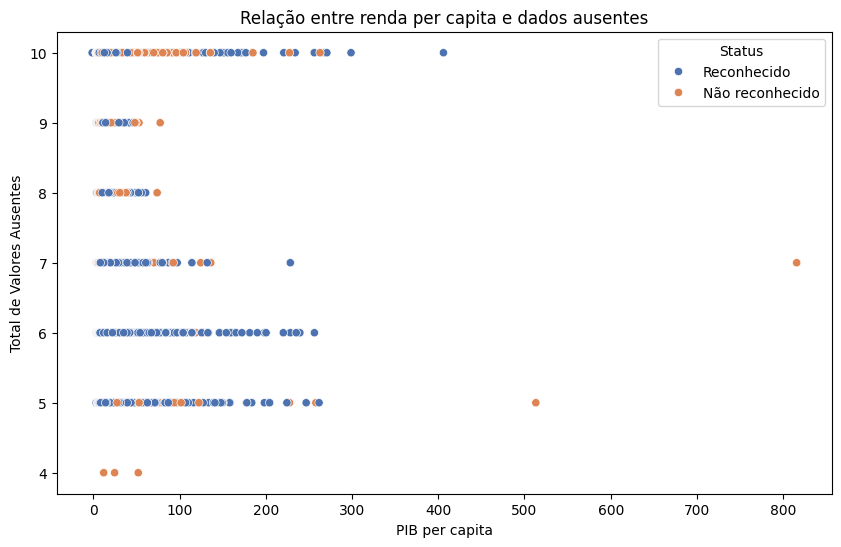

In [10]:
colunas = [
    'DA_Polui/cont do ar', 
    'DA_Polui/cont do solo', 
    'DA_Polui/cont da água', 
    "DA_Incêndi parques/APA's/APP's", 
    'DA_Dimi/exauri hídrico', 
    'DM_Descricao', 
    'DA_Descricao', 
    'PEPL_Descricao', 
    'PEPR_Descricao', 
    'DH_Descricao'
]

df_eventos_missing = df_eventos.copy()

df_eventos_missing = df_eventos_missing.dropna(subset=['PIB'])
#Existem dados para o PIB apenas até 2022.

df_eventos_missing['Total_Missing'] = df_eventos_missing[colunas].isnull().sum(axis=1)
df_eventos_missing['PIB_per_capita'] = df_eventos_missing['PIB'] / df_eventos_missing['Pop']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB_per_capita', y='Total_Missing', data=df_eventos_missing, hue='Status', palette='deep')
plt.title('Relação entre renda per capita e dados ausentes')
plt.xlabel('PIB per capita')
plt.ylabel('Total de Valores Ausentes')
plt.show()


In [11]:
correlation = df_eventos_missing['PIB_per_capita'].corr(df_eventos_missing['Total_Missing'])
print(f"\nCorrelação entre renda per capita e total de valores ausentes: {correlation:.2f}")


Correlação entre renda per capita e total de valores ausentes: -0.08


Correlação baixa entre os valores ausentes nas variáveis DA_Polui/con do ar; DA_Polui/cont do solo; DA_Polui/cont da água; DA_Incênd parques APA's/APP's; DA_Dimi/exauri hídrico; DM_Descricao; DA_Descricao; PEPL_Descricao; PEPR_Descricao; DH_Descricao e a renda per capita do município.

### PIB x Status

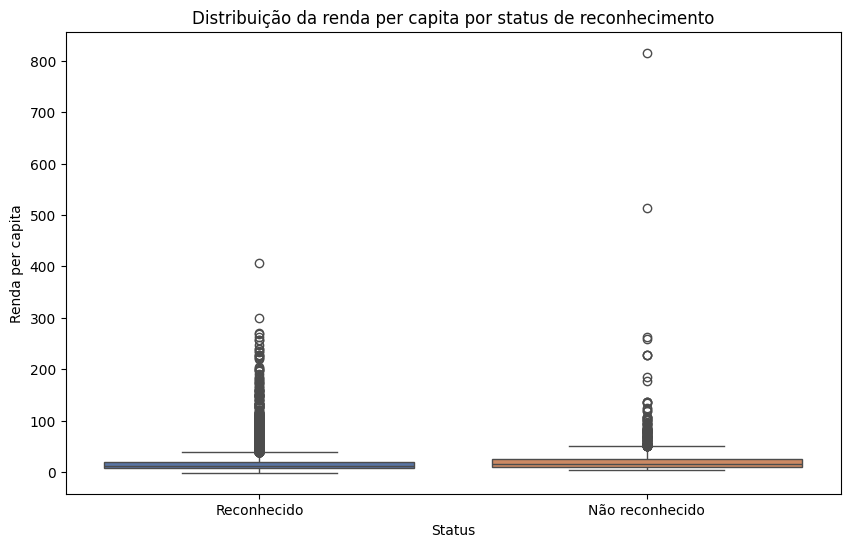

In [12]:
df_eventos_apos2022 = df_eventos.copy()

df_eventos_apos2022 = df_eventos_apos2022.dropna(subset=['PIB'])
#Existem dados para o PIB apenas até 2022.

df_eventos_apos2022['PIB_per_capita'] = df_eventos_apos2022['PIB'] / df_eventos_apos2022['Pop']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='PIB_per_capita', data=df_eventos_apos2022, palette='deep', order=status_counts.index)
plt.title('Distribuição da renda per capita por status de reconhecimento')
plt.xlabel('Status')
plt.ylabel('Renda per capita')
plt.xticks(rotation=0)
plt.show()

Grande quantidade de outliers tanto nos protocolos reconhecimentos como estado de calamidade pública ou situação de emergência.

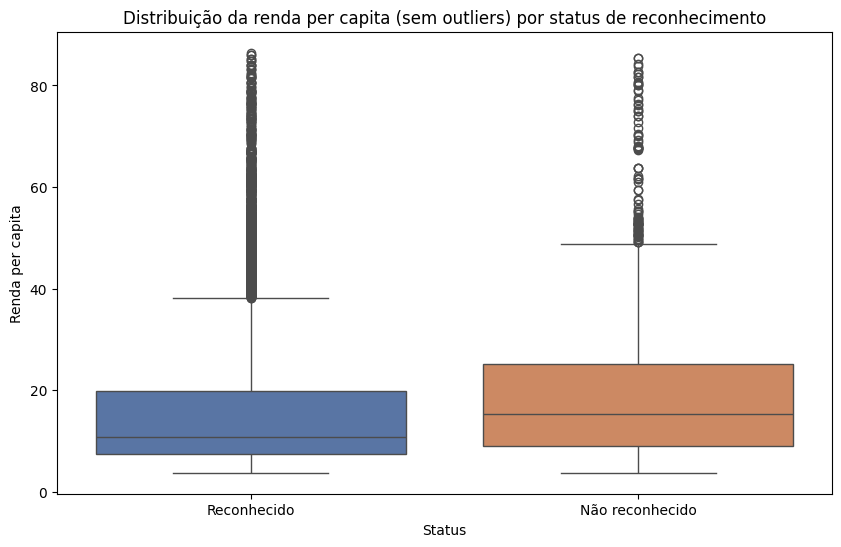

In [13]:
#Eliminando-se os outliers abaixo de 1% e acima de 99% para enxergar melhor a distribuição

q1 = df_eventos_apos2022['PIB_per_capita'].quantile(0.01)
q99 = df_eventos_apos2022['PIB_per_capita'].quantile(0.99)

df_eventos_filtrado = df_eventos_apos2022[(df_eventos_apos2022['PIB_per_capita'] >= q1) & (df_eventos_apos2022['PIB_per_capita'] <= q99)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='PIB_per_capita', data=df_eventos_filtrado, palette='deep', order=status_counts.index)
plt.title('Distribuição da renda per capita (sem outliers) por status de reconhecimento')
plt.xlabel('Status')
plt.ylabel('Renda per capita')
plt.xticks(rotation=0)
plt.show()

Os municípios de maior renda per capita pertencem a não receber o reconhecimento do estado de calamidade pública ou situação de emergência.